In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

In [2]:
data = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
data.shape

(6607, 20)

In [5]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

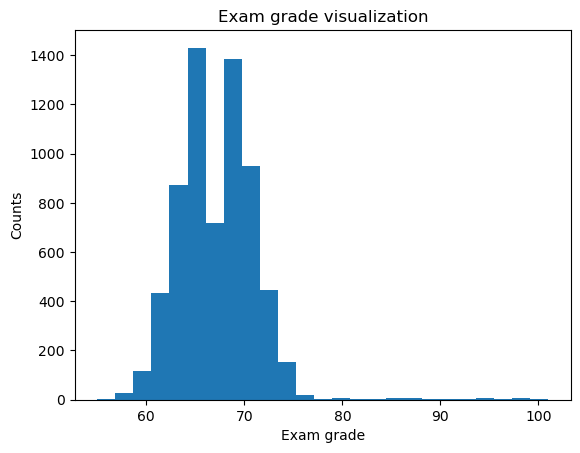

In [7]:
data["Exam_Score"].plot(
    kind="hist",
    bins=25
)

plt.title("Exam grade visualization")
plt.xlabel("Exam grade")
plt.ylabel("Counts")
plt.show()

In [8]:
print("Grade range:", data["Exam_Score"].min(), "-", data["Exam_Score"].max())
print("Missing values count:", data["Exam_Score"].isna().sum())

Grade range: 55 - 101
Missing values count: 0


In [9]:
data[data["Exam_Score"] == 101] ## Everything other than the exam score seems normal

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [10]:
data.loc[data["Exam_Score"] == 101, "Exam_Score"] = 100

In [11]:
print("Max grade after changes:", data["Exam_Score"].max())

Max grade after changes: 100


In [12]:
data.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [13]:
data = data.dropna()

In [14]:
data.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [15]:
data.shape

(6378, 20)

In [16]:
data.drop_duplicates()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [17]:
for col in data.columns: # Check for any outliers and spelling errors
    print(f"Column {col}")
    print(data[col].value_counts(dropna=False))
    print("-"*40)
    

Column Hours_Studied
Hours_Studied
20    448
19    425
21    420
18    393
23    389
22    386
17    370
24    343
16    337
15    303
25    281
14    257
26    255
27    217
13    213
12    189
28    169
11    140
29    131
30    119
10     91
9      79
31     75
8      55
32     54
7      51
33     37
34     27
5      21
35     20
6      17
4      16
3      12
36     10
38      7
39      6
37      6
2       4
1       3
43      1
44      1
Name: count, dtype: int64
----------------------------------------
Column Attendance
Attendance
67     182
76     179
98     178
77     177
64     176
94     175
91     169
84     169
79     169
69     166
68     166
82     165
96     164
80     163
93     163
73     162
81     161
72     160
95     160
74     159
78     158
89     157
61     155
63     153
88     153
97     153
83     152
65     152
90     151
92     150
99     150
71     150
86     149
70     148
87     148
62     146
75     144
85     142
66     140
60      85
100     79
Name: co

In [18]:
# Correlation matrix
corr = data.corr(numeric_only=True)

# Focus on correlation with final_grade
print(corr['Exam_Score'].sort_values(ascending=False))

Exam_Score           1.000000
Attendance           0.580394
Hours_Studied        0.445209
Previous_Scores      0.174292
Tutoring_Sessions    0.156769
Physical_Activity    0.025155
Sleep_Hours         -0.017149
Name: Exam_Score, dtype: float64


In [31]:
data_dummies_eval = pd.get_dummies(data) # Needs to be used
print(data_dummies_eval.corr()['Exam_Score'].sort_values(ascending=False))

Exam_Score                               1.000000
Attendance                               0.580394
Hours_Studied                            0.445209
Previous_Scores                          0.174292
Tutoring_Sessions                        0.156769
Access_to_Resources_High                 0.141711
Parental_Involvement_High                0.139788
Parental_Education_Level_Postgraduate    0.092298
Learning_Disabilities_No                 0.083926
Distance_from_Home_Near                  0.081280
Peer_Influence_Positive                  0.080214
Family_Income_High                       0.073546
Teacher_Quality_High                     0.071623
Extracurricular_Activities_Yes           0.063051
Motivation_Level_High                    0.062914
Internet_Access_Yes                      0.051281
Physical_Activity                        0.025155
Family_Income_Medium                     0.024963
Motivation_Level_Medium                  0.022556
Parental_Education_Level_College         0.017985


In [37]:
data_dummies = pd.get_dummies(data, drop_first=True) 

X = data_dummies.drop(columns=["Exam_Score"])
y = data_dummies["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [41]:
def MSE(y_target, y_pred):
    return np.mean((y_target - y_pred)**2)

def RMSE(y_target, y_pred):
    return np.sqrt(MSE(y_target, y_pred))

In [42]:
models = {
    "Linear": lm.LinearRegression(),
    "Ridge": lm.Ridge(alpha=1.0),
    "Lasso": lm.Lasso(alpha=0.01),
    "RandomForest": RandomForestRegressor(random_state=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = MSE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "RMSE": rmse, "R2": r2}

In [46]:
for name, score in results.items():
    print(name)
    for metric, value in score.items():
        print(metric, value)

Linear
MSE 4.365297082255297
RMSE 2.089329337910923
R2 0.7171117952648646
Ridge
MSE 4.365535631462106
RMSE 2.0893864246381297
R2 0.7170963363497933
Lasso
MSE 4.406830567200483
RMSE 2.0992452375081103
R2 0.7144202641339599
RandomForest
MSE 6.4359579153605
RMSE 2.5369189808428056
R2 0.5829249313115275


In [ ]:
fdfd